In [64]:
random_seed = 0

Takeaways

- Sequential API
- Functional API
- Model Save/Load
- Callbacks
- Tensorboard Visualization
- Basic hyperparameter tuning


# 10.2 MLP


### 10.2.1 Classification with sequential API


In [65]:
import tensorflow as tf

# Load data
fashin_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashin_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Data Shape
print(f"Train data: {X_train.shape}, 55000 batch size with 28 width, 28 height")

# Scale the data
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

# get class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle Boot"]


# Create Model with Sequential API 
tf.random.set_seed(42)
model = tf.keras.Sequential() # Create a Sequential Model
model.add(tf.keras.layers.Input(shape = [28, 28])) # Do not include the batch size, only the sample size.
model.add(tf.keras.layers.Flatten()) # Flatten layer takes the input shape into 1D array [32, 28, 28] -> [32, 784] == X.reshape(-1,784)
model.add(tf.keras.layers.Dense(300, activation = 'relu')) 
model.add(tf.keras.layers.Dense(100, activation = 'relu')) 
model.add(tf.keras.layers.Dense(10, activation = 'softmax')) # 10 neurons since it's multiclass classifier

model.summary()

Train data: (55000, 28, 28), 55000 batch size with 28 width, 28 height


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

#### Get info from Seq API


In [66]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>]

#### Get layer information


In [67]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(f"weights shape: {weights.shape}")
print(f"bias shape: {biases.shape}")

weights shape: (784, 300)
bias shape: (300,)


#### Model Compile

**Loss functions**

- 분류용:
  - "sparse_categorical_crossentropy": 클래스가 정수로 레이블된 다중 클래스 분류에 사용됩니다.
  - "categorical_crossentropy": 클래스가 원핫 인코딩으로 레이블된 다중 클래스 분류에 사용됩니다.
  - "binary_crossentropy": 이진 분류
- 회귀용:
  - "mean_squared_error" 또는 "mse": 평균 제곱 오차, 회귀 문제에 자주 사용됩니다.
  - "mean_absolute_error" 또는 "mae": 평균 절대 오차, 예측값과 실제 값 사이의 절대 차이를 계산합니다.
  - "mean_absolute_percentage_error" 또는 "mape": 평균 절대 백분율 오차, 예측값과 실제 값의 비율 차이를 백분율로 계산합니다.

**optimizers**

- "sgd": 확률적 경사 하강법(Stochastic Gradient Descent)
- "rmsprop": 학습 속도를 조절하는 RMSProp 알고리즘
- "adam": Adam 최적화기 (경사 하강법과 모멘텀을 결합한 최적화) tf.keras.optimizers.Adam(learning_rate=0.001)
- "adagrad": 학습 속도를 데이터에 맞춰 자동 조정합니다.

**metric**

- 분류용:
  - "accuracy" 또는 "acc": 정확도, 예측이 맞는 샘플의 비율
  - "precision": 양성 예측 중 올바르게 예측된 양성의 비율
  - "recall": 실제 양성 중 올바르게 예측된 양성의 비율
  - "f1_score": 정밀도와 재현율의 조화 평균 (Keras에서는 직접 구현해야 함)
- 회귀용:
  - "mae": 평균 절대 오차
  - "mse": 평균 제곱 오차
  - "mean_absolute_percentage_error" 또는 "mape": 예측과 실제 값의 백분율 오차
  - "cosine_proximity": 두 벡터 간의 코사인 유사도


In [68]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = 'sgd',
              metrics = ['accuracy'])

#### Model Training and Evaluation


In [69]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.6960 - loss: 0.9741 - val_accuracy: 0.8278 - val_loss: 0.5022
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.8279 - loss: 0.5032 - val_accuracy: 0.8404 - val_loss: 0.4507
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.8447 - loss: 0.4481 - val_accuracy: 0.8462 - val_loss: 0.4281
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.8545 - loss: 0.4178 - val_accuracy: 0.8498 - val_loss: 0.4141
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.8613 - loss: 0.3964 - val_accuracy: 0.8538 - val_loss: 0.4024
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.8670 - loss: 0.3789 - val_accuracy: 0.8574 - val_loss: 0.3933
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.8716 - loss: 0.3642 - val_accuracy: 0.8610 - val_loss: 0.3833
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.8756 -

#### Plot the history


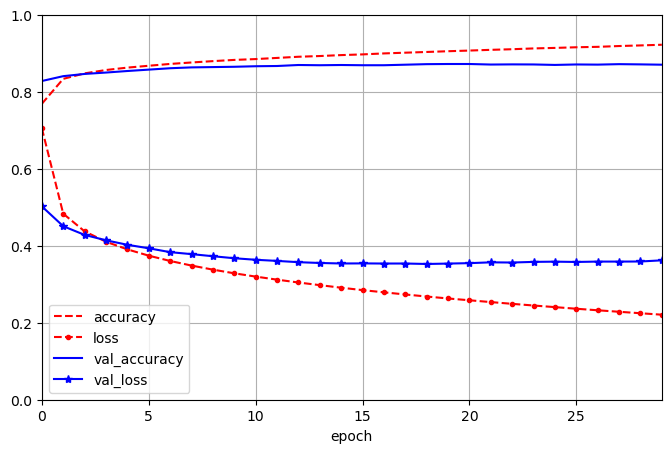

In [70]:
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0,29], ylim=[0, 1], grid=True, xlabel="epoch",
    style=["r--", "r--.", "b-", "b-*"]
)

plt.show()

#### Evaluate the model


In [71]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8698 - loss: 0.3860


[0.38319724798202515, 0.8704000115394592]

#### Model Prediction


In [72]:
import numpy as np

X_new = X_test[:3]

y_proba = model.predict(X_new)

print(f"Predicted Probability \n {y_proba.round(2)}")

y_pred = y_proba.argmax(axis = 1)

print(f"Predicted label: {y_pred}")

print(f"Predicted class: {np.array(class_names)[y_pred]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Probability 
 [[0.   0.   0.   0.   0.   0.22 0.   0.02 0.   0.76]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
Predicted label: [9 2 1]
Predicted class: ['Ankle Boot' 'Pullover' 'Trouser']


### 10.2.2 Regression with Sequential API

- The last layer is Dense layer with 1 node


In [73]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load Data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Fix: Do not specify input_shape directly in Normalization
norm_layer = tf.keras.layers.Normalization()

# Define the model with Input layer
model = tf.keras.Sequential([
    tf.keras.Input(shape=X_train.shape[1:]),  # Explicit Input layer
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Adapt the normalization layer
norm_layer.adapt(X_train)

# Train the model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

# Evaluate the model
mse_test, rmse_test = model.evaluate(X_test, y_test)

# Predict on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - RootMeanSquaredError: 1.3068 - loss: 1.8669 - val_RootMeanSquaredError: 0.6190 - val_loss: 0.3832
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - RootMeanSquaredError: 0.6323 - loss: 0.4002 - val_RootMeanSquaredError: 0.7926 - val_loss: 0.6282
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - RootMeanSquaredError: 0.6079 - loss: 0.3698 - val_RootMeanSquaredError: 0.9598 - val_loss: 0.9211
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - RootMeanSquaredError: 0.5972 - loss: 0.3568 - val_RootMeanSquaredError: 0.9772 - val_loss: 0.9549
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - RootMeanSquaredError: 0.5862 - loss: 0.3438 - val_RootMeanSquaredError: 1.1547 - val_loss: 1.3334
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - RootMeanSquaredError: 0.5777 - loss: 0.3339 - val_RootMeanSquaredError: 1.1253 - val_loss: 1.2662
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - RootMeanSquaredError

### 10.2.3 Functional API with short path

- can create complex and non-sequential model with functional API
- Create all required layers, and use the layers like functions


In [74]:
from keras.utils import plot_model

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)


tf.keras.backend.clear_session()
tf.random.set_seed(42)

# Define layers
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate() # this layer connect two dense layers horizontally
output_layer = tf.keras.layers.Dense(1)

# Construct the functional model
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2]) # short path from input to hidden2 layer
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

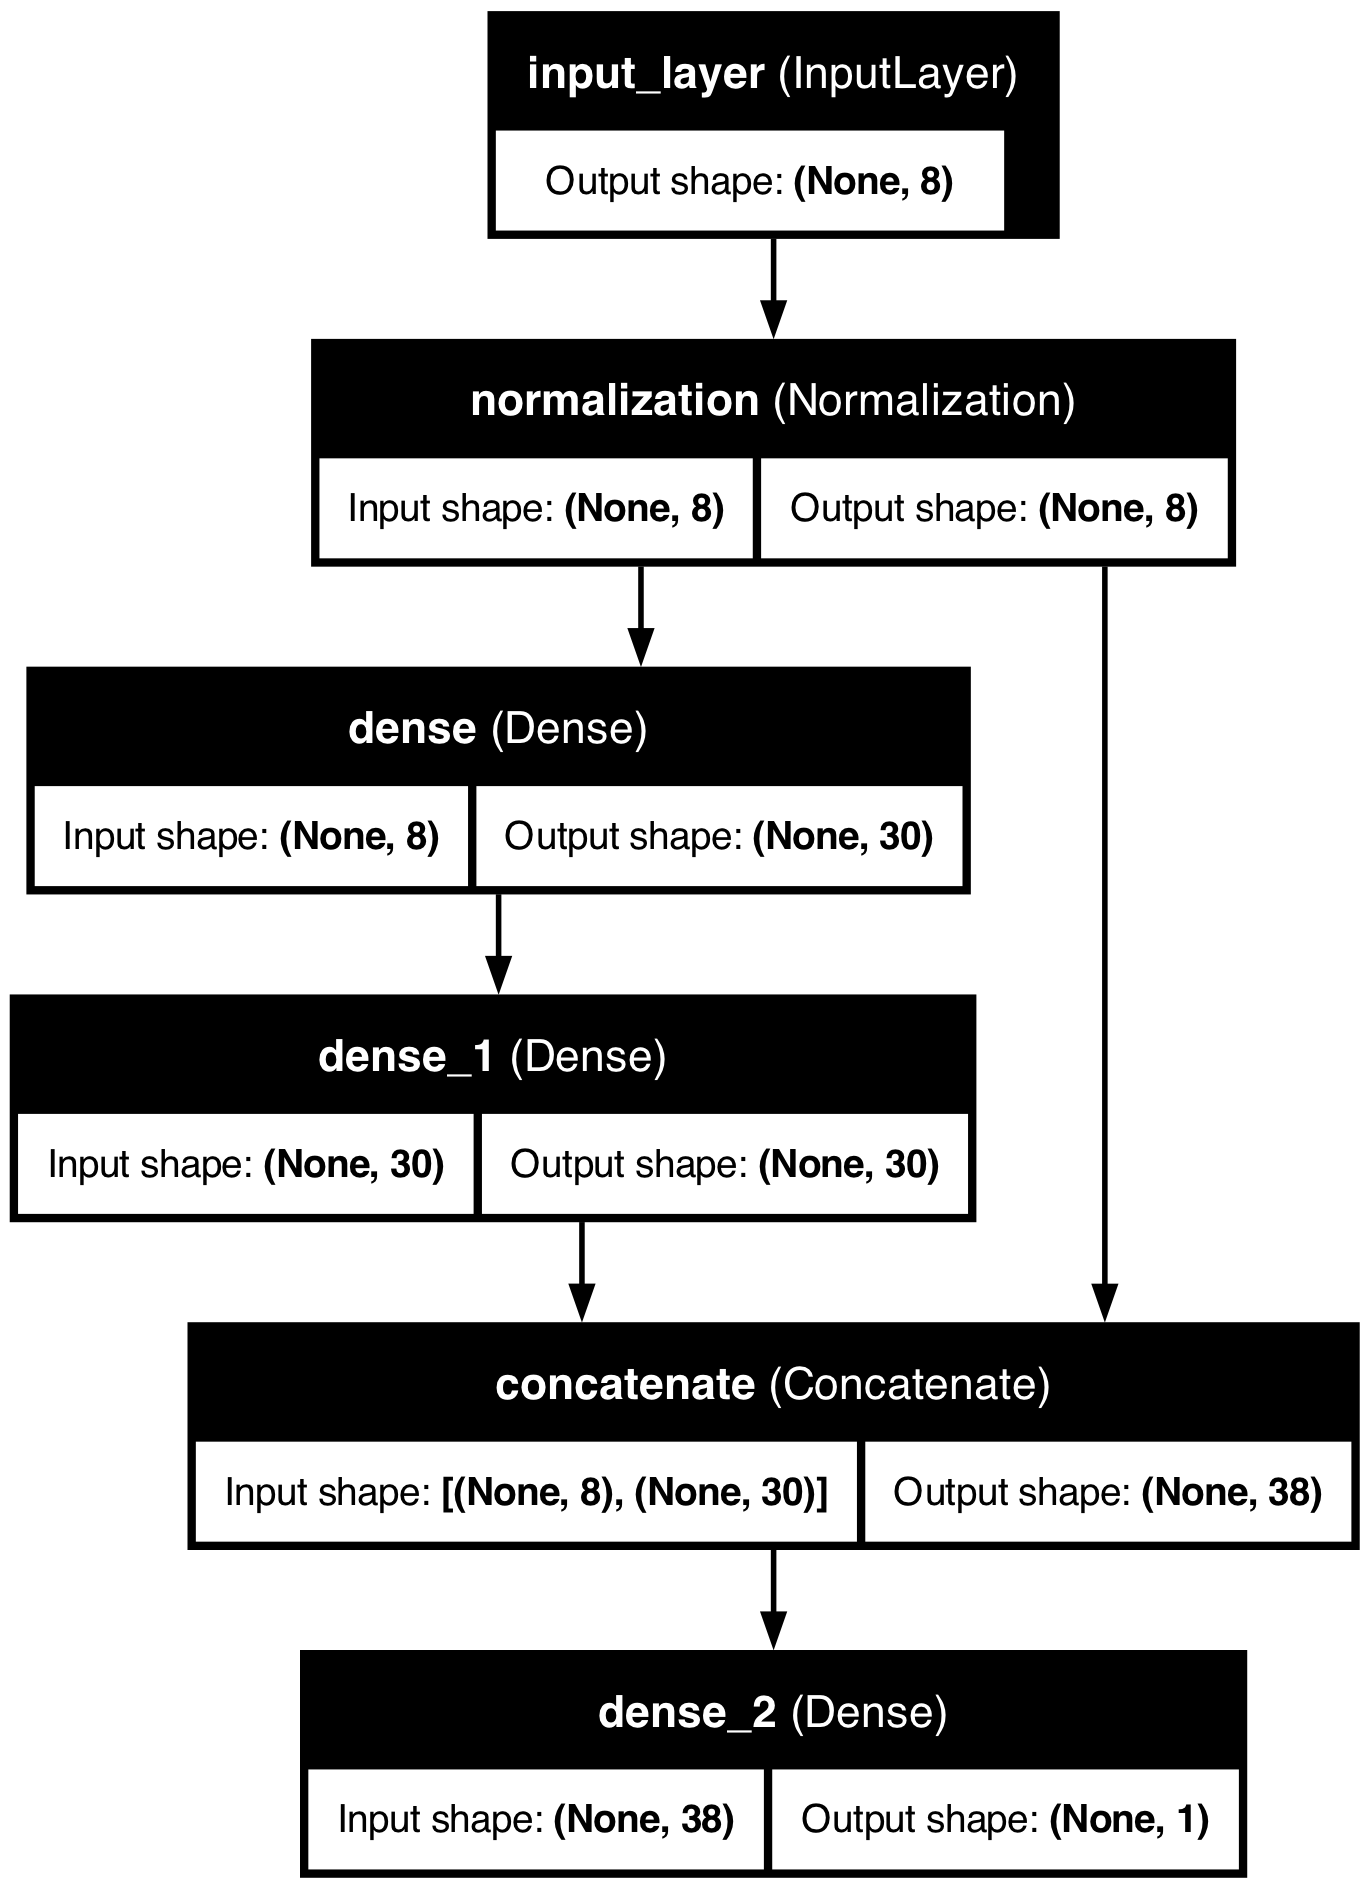

In [75]:
# 모델 그리기
plot_model(model, to_file='./100/functional_API_short_path.png', show_shapes=True, show_layer_names=True)

### 10.2.4 Functional API with wide & short path


In [76]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)


input_wide = tf.keras.layers.Input(shape=[5])  # Choose feature 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # Choose feature 2 ~ 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 6)         │         13 │ input_layer_1[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        210 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 5)         │         11 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 35)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         36 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

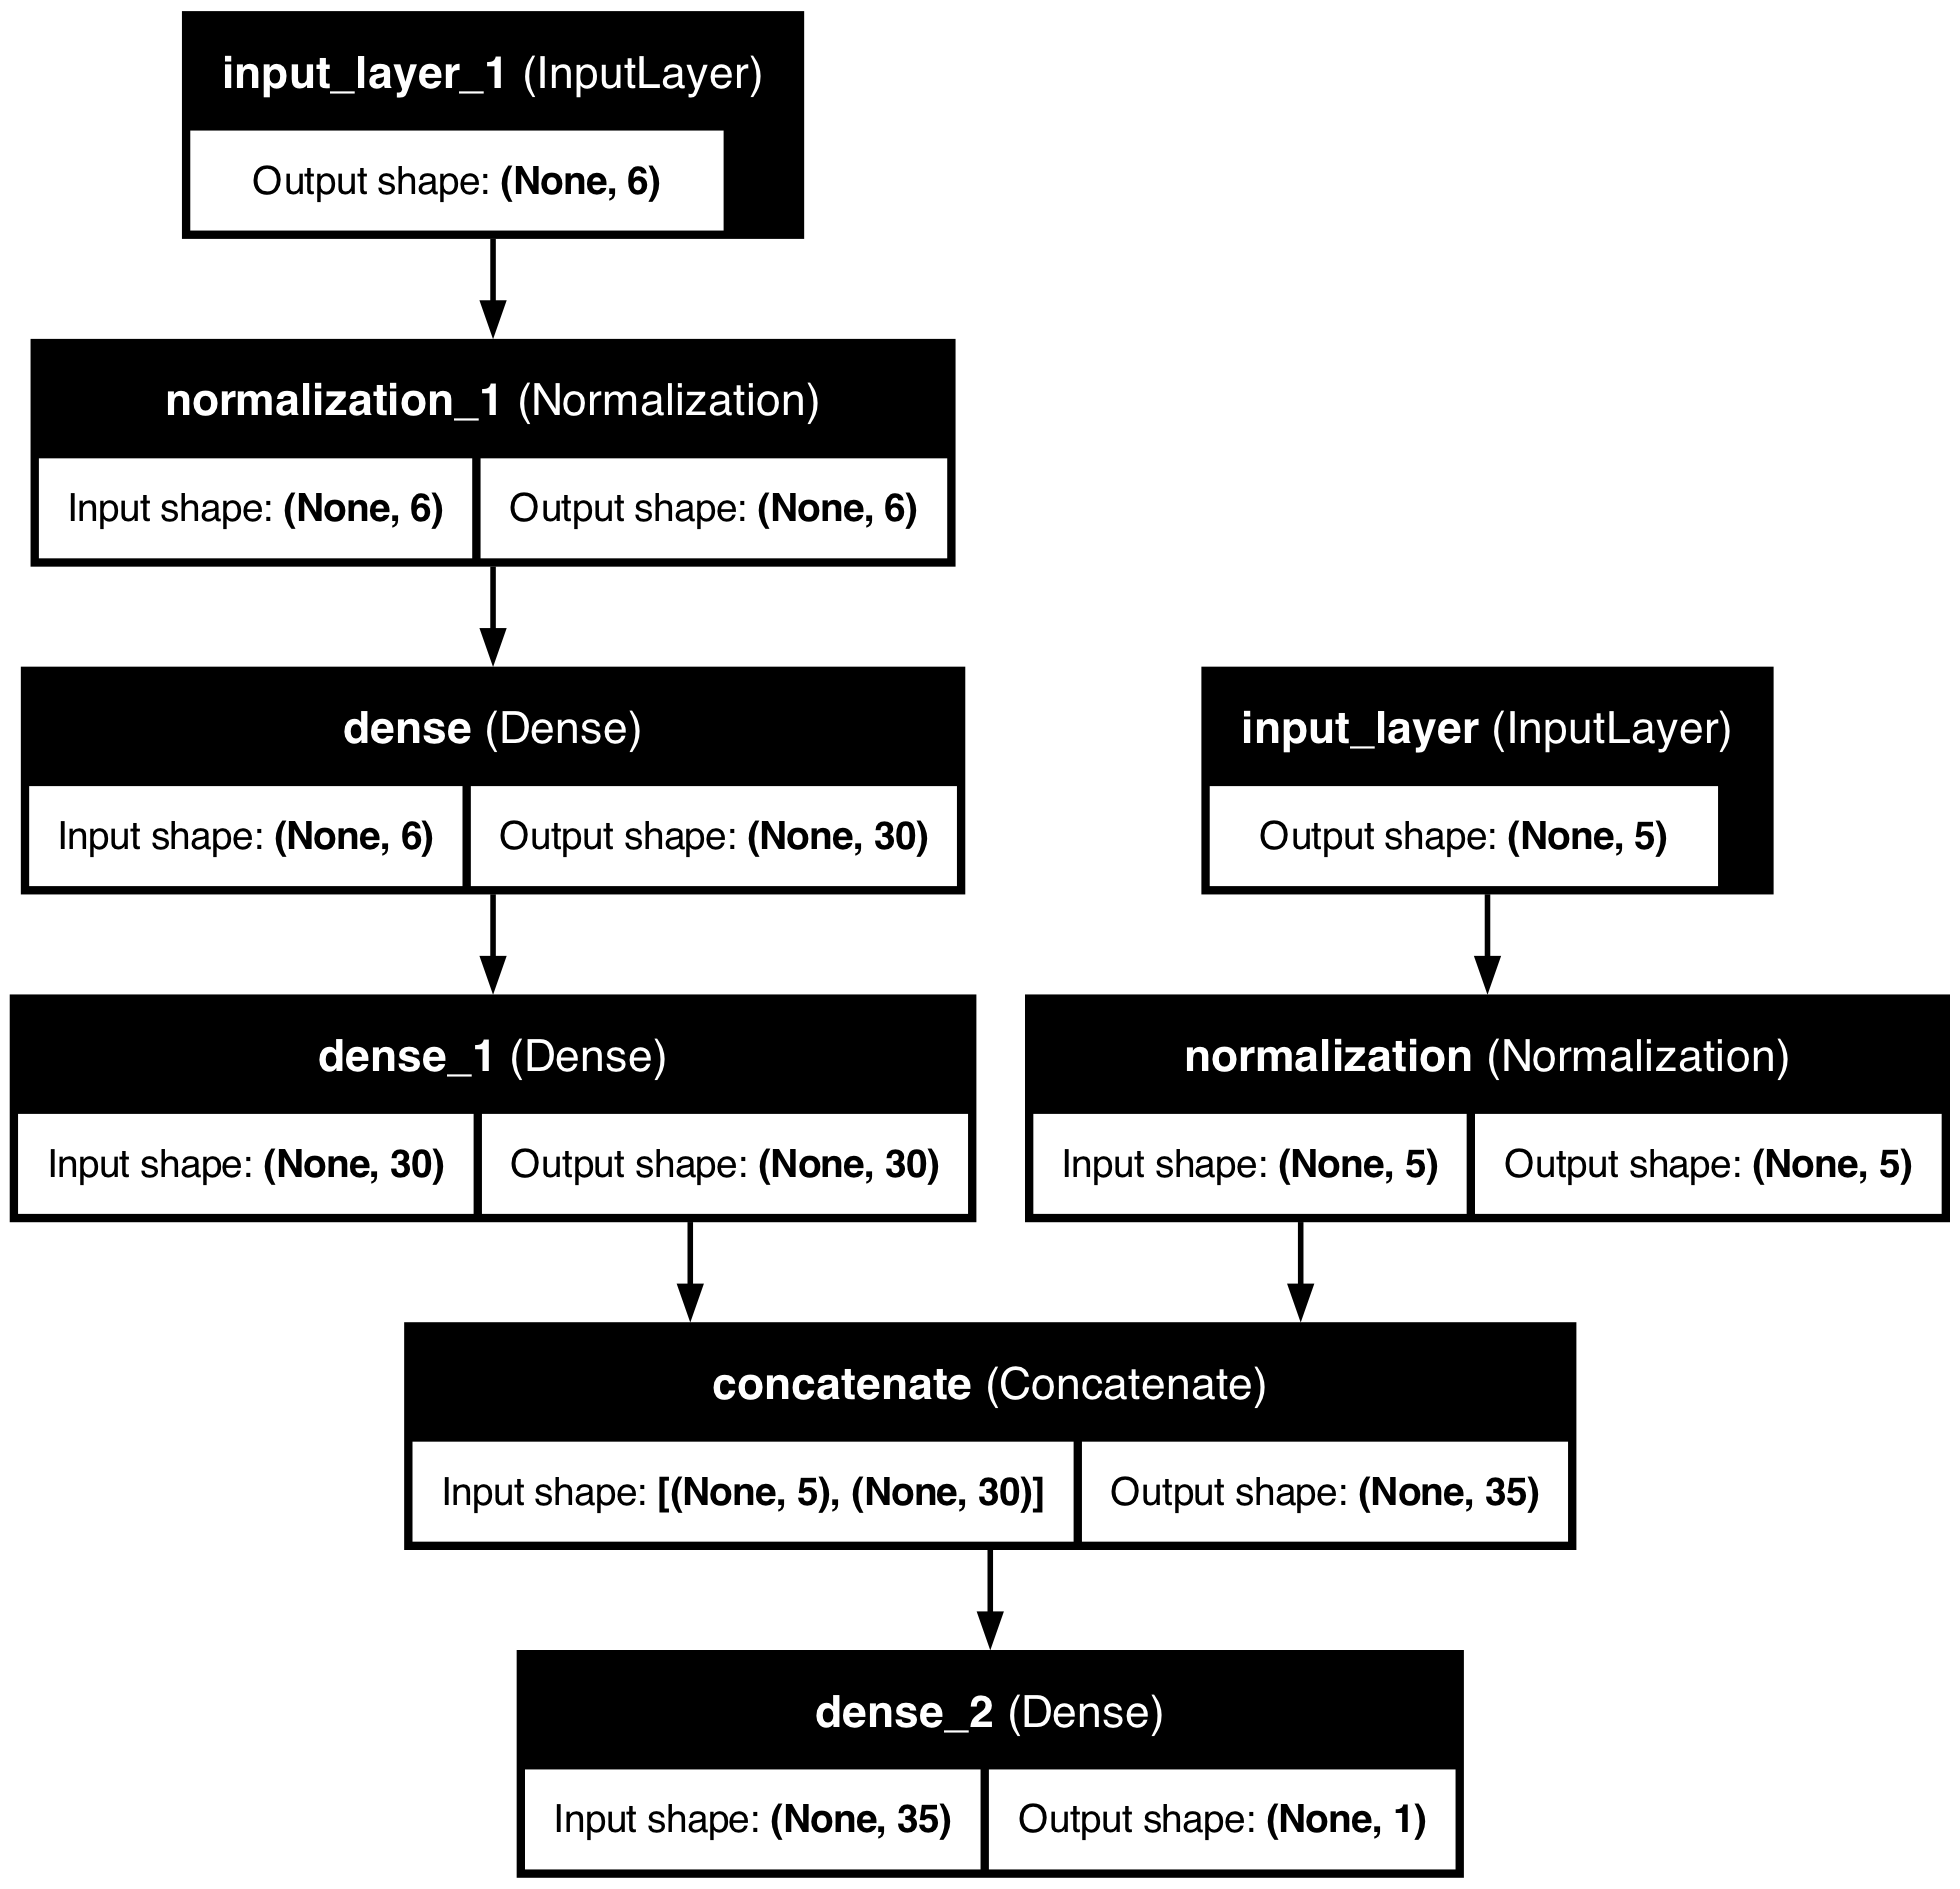

In [77]:
# 모델 그리기
plot_model(model, to_file='./100/functional_API_short&Wide_path.png', show_shapes=True, show_layer_names=True)

In [78]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Select specific features
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20


/Users/yunjaecho/Git/practical_ml_dl/env/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - RootMeanSquaredError: 1.6367 - loss: 2.7697 - val_RootMeanSquaredError: 1.7385 - val_loss: 3.0224
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - RootMeanSquaredError: 0.8401 - loss: 0.7062 - val_RootMeanSquaredError: 0.9710 - val_loss: 0.9428
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - RootMeanSquaredError: 0.7467 - loss: 0.5580 - val_RootMeanSquaredError: 0.6990 - val_loss: 0.4886
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - RootMeanSquaredError: 0.6925 - loss: 0.4799 - val_RootMeanSquaredError: 0.6525 - val_loss: 0.4257
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - RootMeanSquaredError: 0.6558 - loss: 0.4303 - val_RootMeanSquaredError: 0.6172 - val_loss: 0.3809
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - RootMeanSquaredError: 0.6317 - loss: 0.3993 - val_RootMeanSquaredError: 0.6001 - val_loss: 0.3601
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - RootMeanSquaredError: 0.6173 - 

### 10.2.4 Functional API with multiple outputs

- for multitask classification
- for regulation. Check if the lower stream networks learn meaningful information


In [79]:
# Multioutput for regulation

tf.keras.backend.clear_session()
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
# Output Layer
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
# Define loss function for each output and weight
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError","RootMeanSquaredError"])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 6)         │         13 │ input_layer_1[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        210 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 5)         │         11 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 35)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         36 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         31 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

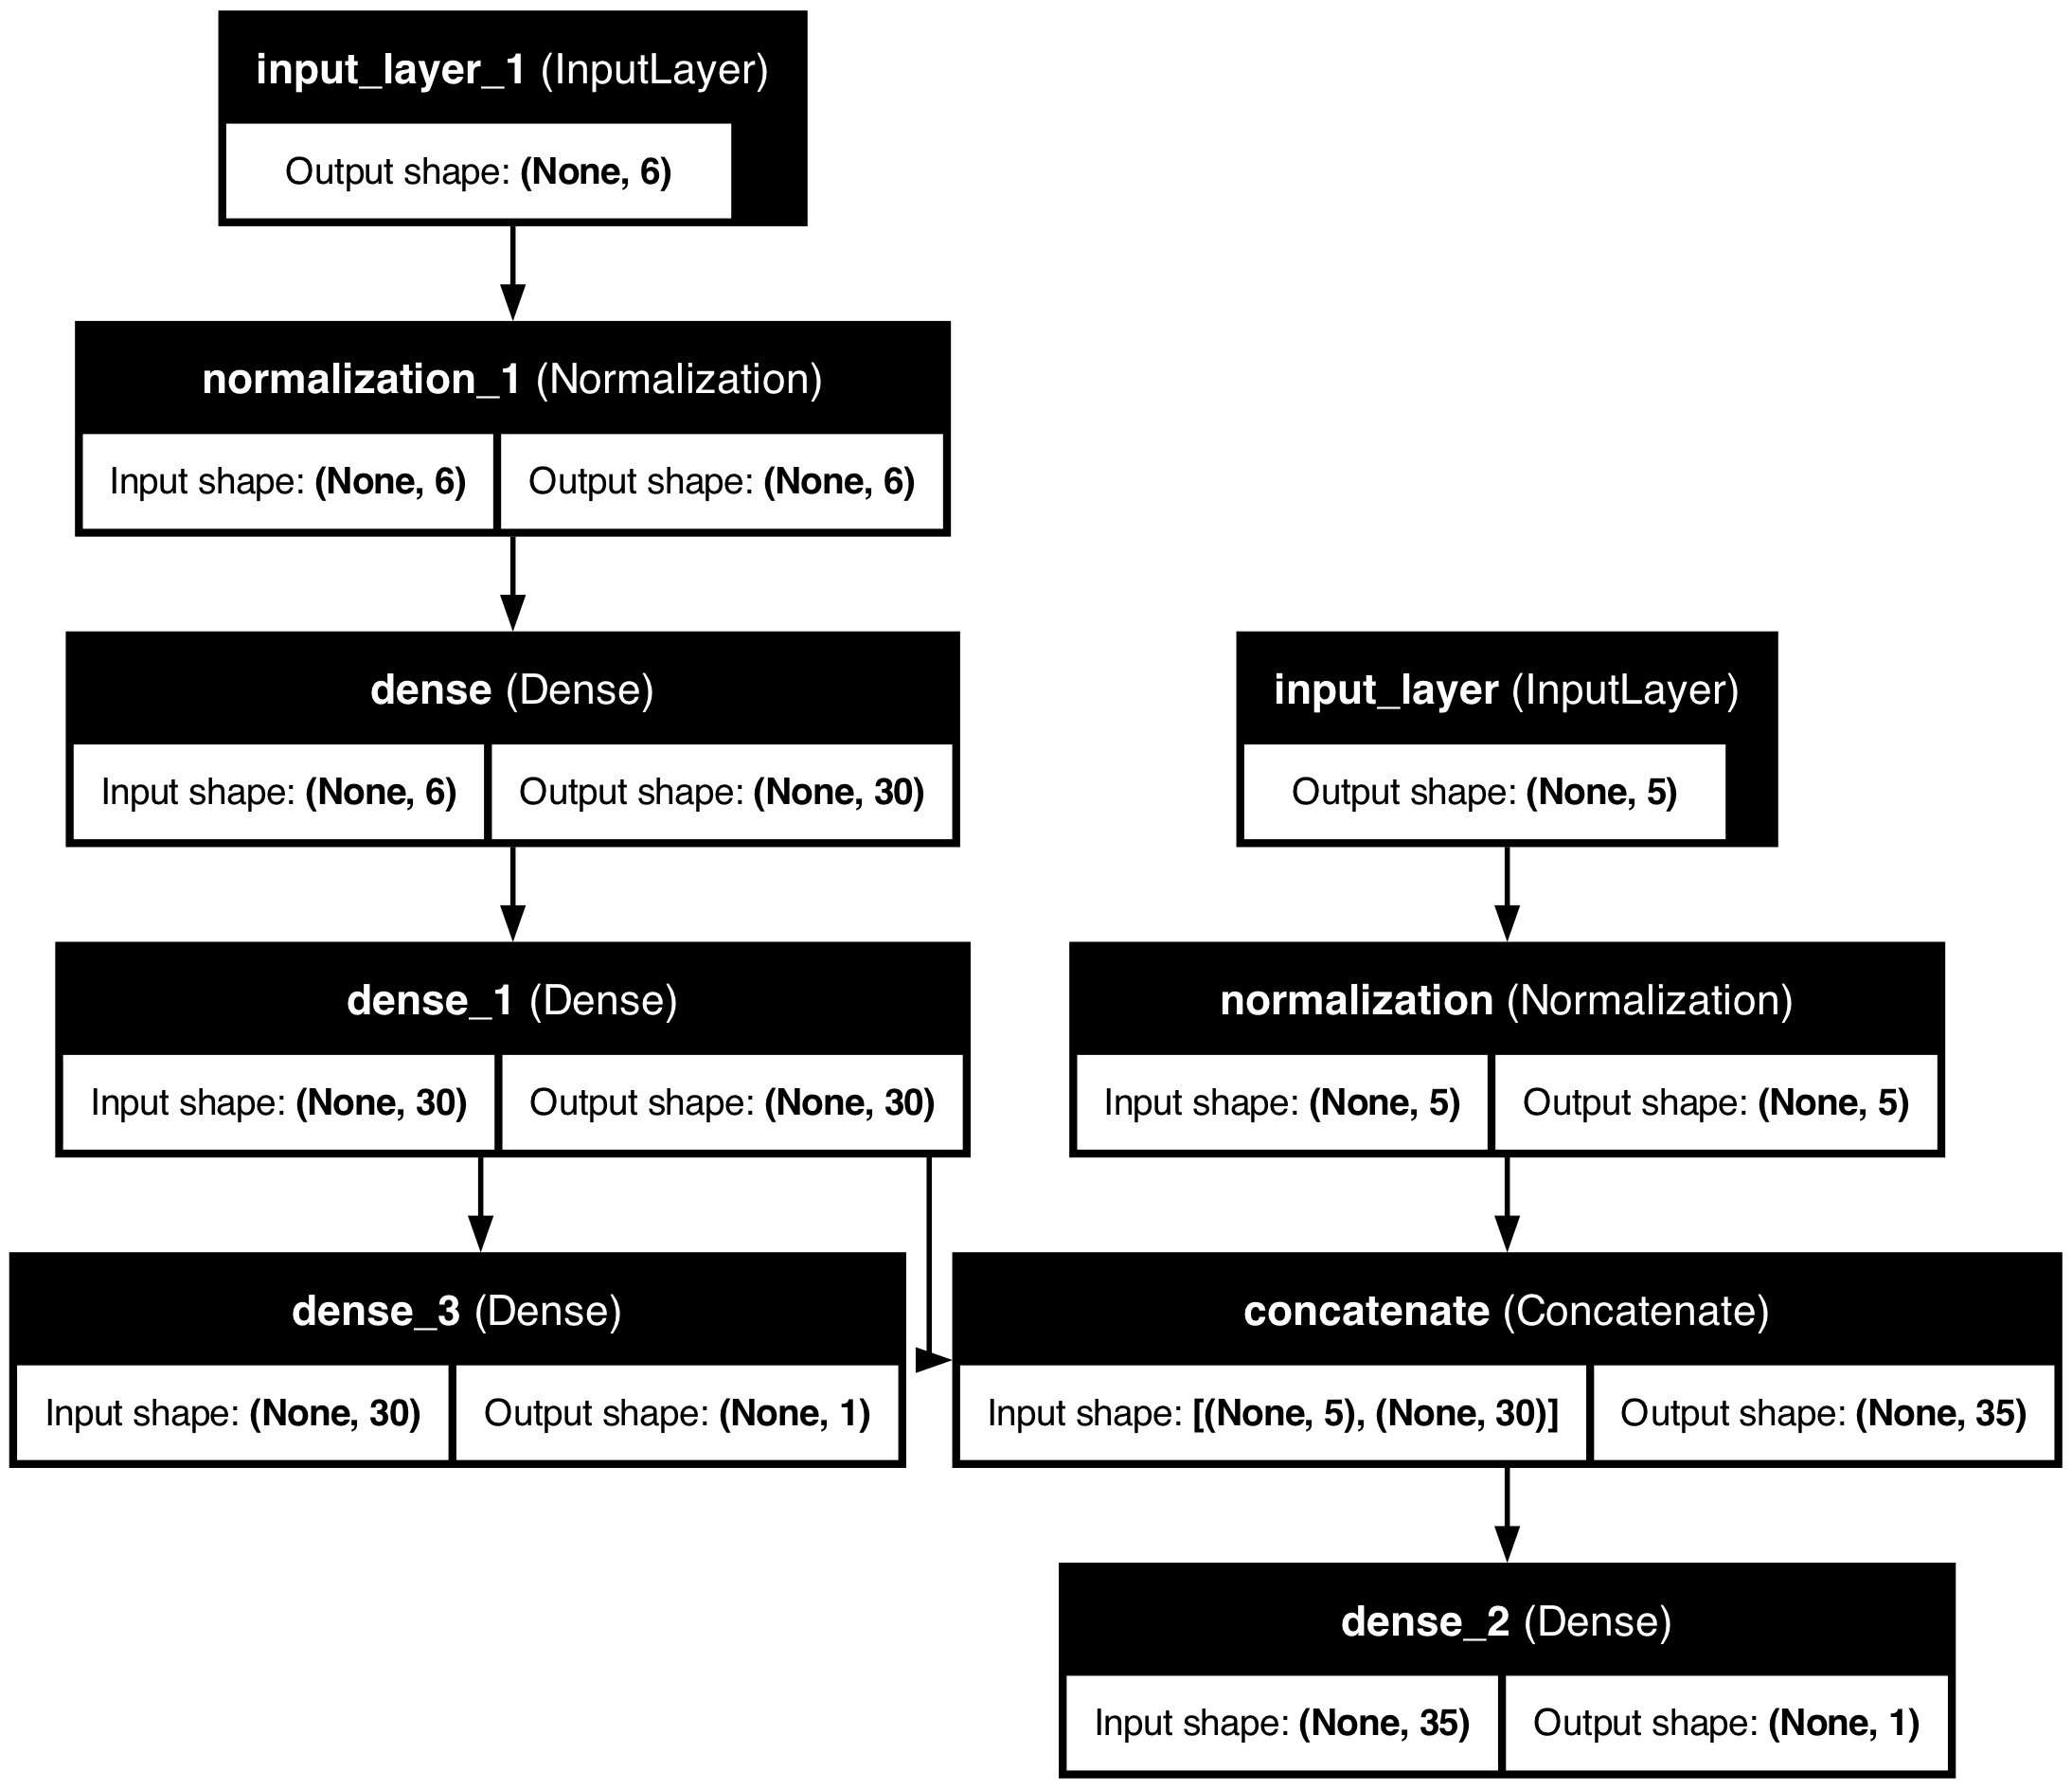

In [80]:
# 모델 그리기
plot_model(model, to_file='./100/functional_API_short&Wide_path.png', show_shapes=True, show_layer_names=True)

In [94]:
# Fit the model
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

# Evaluate the model
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

# Predict the value
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - dense_2_RootMeanSquaredError: 0.5701 - dense_2_loss: 0.2925 - dense_3_RootMeanSquaredError: 0.6168 - dense_3_loss: 0.0381 - loss: 0.3306 - val_dense_2_RootMeanSquaredError: 0.6765 - val_dense_2_loss: 0.4118 - val_dense_3_RootMeanSquaredError: 0.7318 - val_dense_3_loss: 0.0535 - val_loss: 0.4655
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - dense_2_RootMeanSquaredError: 0.5691 - dense_2_loss: 0.2915 - dense_3_RootMeanSquaredError: 0.6144 - dense_3_loss: 0.0378 - loss: 0.3293 - val_dense_2_RootMeanSquaredError: 0.6635 - val_dense_2_loss: 0.3960 - val_dense_3_RootMeanSquaredError: 0.6157 - val_dense_3_loss: 0.0379 - val_loss: 0.4341
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - dense_2_RootMeanSquaredError: 0.5684 - dense_2_loss: 0.2908 - dense_3_RootMeanSquaredError: 0.6141 - dense_3_loss: 0.0377 - loss: 0.3285 - val_dense_2_RootMeanSquaredError: 0.9786 - val_dense_2_loss: 0.8615 - val_dense_3_RootMeanSquaredErro

### 10.2.5 Model Save and Load

- Sometimes, model training requires very long time to train, need to save checkpoints in order to prevent the environment issue


In [ ]:
# Save model
model.save("./100/my_keras_model.keras")

# Load Model
loaded_model = tf.keras.models.load_model("./100/my_keras_model.keras")
y_pred_main, y_pred_aux = loaded_model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


### 10.2.6 Callbacks

- fit method has **callback** parameters


#### checkpoint call back


In [100]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./100/my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - dense_2_RootMeanSquaredError: 0.5453 - dense_2_loss: 0.2677 - dense_3_RootMeanSquaredError: 0.5837 - dense_3_loss: 0.0341 - loss: 0.3018 - val_dense_2_RootMeanSquaredError: 0.7723 - val_dense_2_loss: 0.5366 - val_dense_3_RootMeanSquaredError: 0.8117 - val_dense_3_loss: 0.0659 - val_loss: 0.6027
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - dense_2_RootMeanSquaredError: 0.5448 - dense_2_loss: 0.2672 - dense_3_RootMeanSquaredError: 0.5825 - dense_3_loss: 0.0339 - loss: 0.3011 - val_dense_2_RootMeanSquaredError: 0.6871 - val_dense_2_loss: 0.4248 - val_dense_3_RootMeanSquaredError: 0.6365 - val_dense_3_loss: 0.0405 - val_loss: 0.4654
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - dense_2_RootMeanSquaredError: 0.5438 - dense_2_loss: 0.2662 - dense_3_RootMeanSquaredError: 0.5823 - dense_3_loss: 0.0339 - loss: 0.3001 - val_dense_2_RootMeanSquaredError: 0.9011 - val_dense_2_loss: 0.7305 - val_dense_3_RootMeanSquaredErro

#### EarlyStopping callback


In [102]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - dense_2_RootMeanSquaredError: 0.5388 - dense_2_loss: 0.2613 - dense_3_RootMeanSquaredError: 0.5764 - dense_3_loss: 0.0332 - loss: 0.2946 - val_dense_2_RootMeanSquaredError: 0.5665 - val_dense_2_loss: 0.2888 - val_dense_3_RootMeanSquaredError: 0.5862 - val_dense_3_loss: 0.0344 - val_loss: 0.3232
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - dense_2_RootMeanSquaredError: 0.5385 - dense_2_loss: 0.2610 - dense_3_RootMeanSquaredError: 0.5765 - dense_3_loss: 0.0332 - loss: 0.2943 - val_dense_2_RootMeanSquaredError: 0.6792 - val_dense_2_loss: 0.4151 - val_dense_3_RootMeanSquaredError: 0.7670 - val_dense_3_loss: 0.0588 - val_loss: 0.4740
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - dense_2_RootMeanSquaredError: 0.5386 - dense_2_loss: 0.2611 - dense_3_RootMeanSquaredError: 0.5759 - dense_3_loss: 0.0332 - loss: 0.2943 - val_dense_2_RootMeanSquaredError: 0.7018 - val_dense_2_loss: 0.4431 - val_dense_3_RootMeanSquaredE

### 10.2.7 tensorboard

- Need to define the log directory and set the tensorboard callback
- It's not optimal to log for every batch due to memory issue, so set the profile batch


In [106]:
from pathlib import Path
from time import strftime

# Create a log directory
def get_run_logdir(root_logdir="./100/my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()



# Create model
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)


# define tensorboard call back and fit
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])


Epoch 1/20


/Users/yunjaecho/Git/practical_ml_dl/env/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-01-03 17:45:59.907199: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-01-03 17:45:59.907214: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-01-03 17:45:59.907459: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - RootMeanSquaredError: 1.6481 - loss: 2.7964 - val_RootMeanSquaredError: 1.2613 - val_loss: 1.5909
Epoch 2/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - RootMeanSquaredError: 1.0742 - loss: 1.1539

2025-01-03 17:46:00.143785: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-01-03 17:46:00.143795: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-01-03 17:46:00.176812: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2025-01-03 17:46:00.186721: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2025-01-03 17:46:00.188757: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: 100/my_logs/run_2025_01_03_17_45_59/plugins/profile/2025_01_03_17_46_00/MacBook-Pro-2.local.xplane.pb


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - RootMeanSquaredError: 0.8922 - loss: 0.7967 - val_RootMeanSquaredError: 0.8581 - val_loss: 0.7364
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - RootMeanSquaredError: 0.8407 - loss: 0.7077 - val_RootMeanSquaredError: 0.7900 - val_loss: 0.6241
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - RootMeanSquaredError: 0.8115 - loss: 0.6596 - val_RootMeanSquaredError: 0.7580 - val_loss: 0.5746
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - RootMeanSquaredError: 0.7875 - loss: 0.6211 - val_RootMeanSquaredError: 0.7348 - val_loss: 0.5400
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - RootMeanSquaredError: 0.7667 - loss: 0.5888 - val_RootMeanSquaredError: 0.7162 - val_loss: 0.5129
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - RootMeanSquaredError: 0.7485 - loss: 0.5613 - val_RootMeanSquaredError: 0.7011 - val_loss: 0.4916
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - RootMeanSquaredError: 0.7327 - 

#### Run Tensorboard


In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./100/my_logs


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10706), started 0:01:50 ago. (Use '!kill 10706' to kill it.)

### 10.3 Hyperparameter Tuning

- Keras Tuner is usful for hpy-tuning


#### Keras Tuner with RandomSearch

- **RandomSearch**
  - call build_model() once to collect all hpyperparameter configuration
  - for max_trial, it creates model with random hypeparameter, train for 10 epochs and save at "./100/my_fashion_mnist"
  - overwrite = True option tries all the tuning from the beginning, if false, continue from where left off


In [115]:
import keras_tuner as kt

# define the model
def build_model(hp):
    # 1. Define hpyer parameters
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # 2. Define a model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten()) 
    for _ in range(n_hidden): # dynamically create a model
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    # 3. compile the model
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

# Perform the random search
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="./100/my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004392764996737242
Total elapsed time: 00h 00m 10s


In [116]:
# Get the top 3 models
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

# 
top3_hpys = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_hpys[0].values


/Users/yunjaecho/Git/practical_ml_dl/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


{'n_hidden': 5,
 'n_neurons': 25,
 'learning_rate': 0.0006562536901904111,
 'optimizer': 'sgd'}

#### Model sumamry


In [ ]:
# get the best model
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
# get the metrics
best_trial.metrics.get_last_value('val_accuracy')
# get summary
best_trial.summary()


Trial 0 summary
Hyperparameters:
n_hidden: 5
n_neurons: 25
learning_rate: 0.0006562536901904111
optimizer: sgd
Score: 0.004392764996737242


#### Train with the best model


In [119]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.0027 - loss: 1.5274
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.0027 - loss: 1.5194
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.0027 - loss: 1.5101
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.0027 - loss: 1.5068
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.0027 - loss: 1.5049
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.0027 - loss: 1.5033
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.0027 - loss: 1.5021
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.0027 - loss: 1.5010
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.0027 - loss: 1.5012
Epoch 10/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.0027 - loss: 1.4999
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.0016 - loss: 1.5215    


#### Save the best model


In [ ]:
# Save the model
best_model.save("./100/my_best_model_with_tuner.keras")

# Load Model and use
loaded_model = tf.keras.models.load_model("./100/my_best_model_with_tuner.keras")
y_pred_main = loaded_model.predict(X_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
